In [17]:
import pandas as pd
df = pd.read_csv(r'featured_df.csv')

In [34]:
df.tail()

,event_id,date,away_team,away_player,away_score,home_team,home_player,home_score,total_score,matchup_key,...,delta_std_10-3_home_pos,delta_std_10-3_away_pos,ewma_0.03,ewma_0.15,home_median,home_std,home_avg,away_median,away_std,away_avg
26879,9789983,2025-04-09 11:06:00,Netherlands,Bomb1to,3.0,Sweden,Wboy,2.0,5.0,"('bomb1to', 'wboy')",...,-0.314831,-0.094422,5.906765,5.383631,3.0,1.728876,2.989130,3.0,1.594433,2.826087
26880,9789984,2025-04-09 11:06:00,Portugal,Jekunam,1.0,Mexico,Arcos,3.0,4.0,"('arcos', 'jekunam')",...,-0.228595,-0.076995,5.539631,5.574487,2.0,1.460268,2.551724,3.0,1.455873,2.770115
26881,9790070,2025-04-09 11:14:00,Man City,sane4ek8,2.0,Boca Juniors,labotryas,2.0,4.0,"('labotryas', 'sane4ek8')",...,-0.605628,-0.927063,4.912904,4.587610,2.0,1.254265,2.511278,2.0,1.159261,2.315789
26882,9790071,2025-04-09 11:14:00,PSG,Flewless_phoenix,2.0,Real Madrid,FEARGGWP,0.0,2.0,"('fearggwp', 'flewless_phoenix')",...,0.047219,-0.260536,4.329009,4.555433,2.0,1.380211,2.233871,2.0,1.259175,2.056452
26883,9789627,2025-04-09 11:38:00,Man City,sane4ek8,5.0,PSG,Flewless_phoenix,2.0,7.0,"('flewless_phoenix', 'sane4ek8')",...,-0.306191,-0.800751,4.391331,4.242091,2.0,1.327684,2.385185,2.0,1.493948,2.318519


In [ ]:
FEATURES = ['time_since_start', 'last_h2h', 'h2h_count', 'h2h_9h_count',
       'is_return_match', 'l1', 'l2', 'l3', 'median_3', 'std_3', 'avg_3',
       'median_10', 'std_10', 'avg_10', 'median_10_home_pos',
       'std_10_home_pos', 'avg_10_home_pos', 'median_10_away_pos',
       'std_10_away_pos', 'avg_10_away_pos', 'median_3_home_pos',
       'std_3_home_pos', 'avg_3_home_pos', 'median_3_away_pos',
       'std_3_away_pos', 'avg_3_away_pos', 'consistency_3_home_pos',
       'consistency_3_away_pos', 'consistency_10_home_pos',
       'consistency_10_away_pos', 'delta_avg_10-3_home_pos',
       'delta_avg_10-3_away_pos', 'delta_std_10-3_home_pos',
       'delta_std_10-3_away_pos', 'ewma_0.03', 'ewma_0.15', 'home_median',
       'home_std', 'home_avg', 'away_median', 'away_std', 'away_avg',
]

In [28]:
X = df[FEATURES].copy()

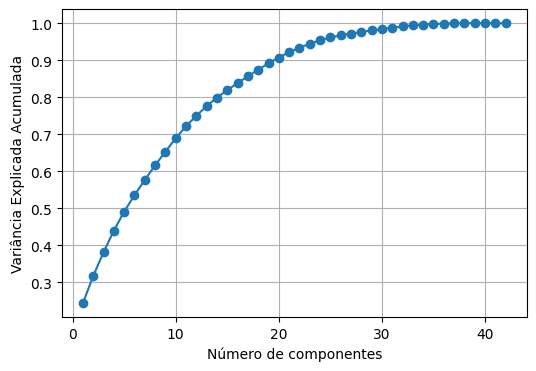

                      PC1       PC2       PC3       PC4       PC5       PC6  \
ewma_0.15        0.295385  0.008493  0.072676  0.033669  0.005388  0.023695   
avg_10           0.278739  0.016558  0.098677  0.041152  0.006051  0.018004   
median_10        0.260807  0.020732  0.086472  0.062678  0.005250  0.023804   
away_avg         0.251744  0.057485  0.133237  0.028336  0.003842  0.040336   
avg_3            0.250671  0.016114  0.028352  0.013621  0.004272  0.055615   
home_avg         0.249554  0.000628  0.145860  0.026903  0.005374  0.013106   
ewma_0.03        0.243545  0.018768  0.139738  0.025241  0.005065  0.002895   
median_3         0.228660  0.012494  0.034289  0.036192  0.006126  0.055837   
home_median      0.209325  0.001759  0.128178  0.049574  0.013536  0.038193   
avg_10_away_pos  0.207919  0.218803  0.152964  0.016781  0.054886  0.003880   

                      PC7       PC8       PC9      PC10  ...      PC33  \
ewma_0.15        0.062305  0.037116  0.009003  0.002322 

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Gráfico de variância explicada
var_acum = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(6,4))
plt.plot(range(1, len(var_acum)+1), var_acum, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

# 6. Loadings (cargas)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(FEATURES))],
    index=FEATURES
)
print(loadings.abs().sort_values('PC1', ascending=False).head(10))

In [37]:
df['delta_ewma'] = df['ewma_0.03'] - df['ewma_0.15']
df['delta_3vs10'] = df['avg_3'] - df['avg_10']
df['dela_at'] = df['avg_10'] - (df['home_avg'] + df['away_avg'])

In [38]:
PCA_FEATURES = [
    'ewma_0.15', 'ewma_0.03',
    'avg_10', 'median_10',
    'avg_3', 'median_3',
    'home_avg', 'away_avg',
    'delta_ewma', 'delta_3vs10',
    'delta_at'
]

ORIGINAL_DF = [
    'event_id', 'date',
    'away_team', 'away_player', 'away_score',
    'home_team', 'home_player', 'home_score', 'total_score'
]

TARGET = ['total_score']

In [39]:
from datetime import datetime

In [40]:
df['date'] = pd.to_datetime(df['date'])
split_date = datetime(2025, 3, 20)
df_train = df[df['date'] < split_date]
df_valid = df[df['date'] >= split_date]

In [50]:
#Poisson Deviance, WMape
#Baseline: Soma Média Casa + Média Fora
import numpy as np
from sklearn.metrics import mean_poisson_deviance, root_mean_squared_error

def wmape(y_true, y_pred, eps=1e-8):
    """
    Calcula o WMAPE entre y_true e y_pred.
    eps evita divisão por zero quando sum(y_true)=0.
    Retorna valor em %.
    """
    num = np.abs(y_pred - y_true).sum()
    den = y_true.sum()
    return 100 * num / (den + eps)


y_pred = df_train['home_avg'] + df_train['away_avg']
y_true = df_train['total_score']
rmse = root_mean_squared_error(y_true, y_pred)
deviance = mean_poisson_deviance(y_true, y_pred)

print(f"WMAPE: {wmape(y_true, y_pred):.2f}%")
print(f"Poisson Deviance média: {deviance:.4f}")
print(f"RMSE: {rmse:.4f}")
 

WMAPE: 34.53%
Poisson Deviance média: 0.9642
RMSE: 2.0761


In [51]:
X_train = df_train[FEATURES]
y_train = df_train['total_score']

X_valid = df_valid[FEATURES]
y_valid = df_valid['total_score']

In [87]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=500,
    scoring='neg_root_mean_squared_error',
    verbose=10
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5; 1/500] START colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6
[CV 1/5; 1/500] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6;, score=-2.184 total time=   0.2s
[CV 2/5; 1/500] START colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6
[CV 2/5; 1/500] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6;, score=-2.129 total time=   0.2s
[CV 3/5; 1/500] START colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6
[CV 3/5; 1/500] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6;, score=-2.214 total time=   0.2s
[CV 4/5; 1/500] START colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.6
[CV 4/5; 1/500] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimato

KeyboardInterrupt: 

In [ ]:
y_true = df_valid['total_score']
y_pred = best_model.predict(X_valid)
rmse = root_mean_squared_error(y_true, y_pred)
deviance = mean_poisson_deviance(y_true, y_pred)

In [82]:
print(f"WMAPE: {wmape(y_true, y_pred):.2f}%")
print(f"Poisson Deviance média: {deviance:.4f}")
print(f"RMSE: {rmse:.4f}")

WMAPE: 33.84%
Poisson Deviance média: 0.9546
RMSE: 2.1202
